In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
%matplotlib inline

reference git: https://github.com/brianfarris/RLtalk/blob/master/RLtalk.ipynb

## Stationary problem

In [3]:
class Bandit:
    def __init__(self, arm_vals = None):
        # If arm values not provided generate random values between [0,1] of length 10
        if arm_vals == None:
            self.arm_values = np.random.normal(0,1,10) # actual mean value of actions # mean reward
        else:
            self.arm_values = arm_vals
        
        self.K = np.zeros(len(self.arm_values)) # number of actions
        self.est_values = np.zeros(len(self.arm_values)) # estimated value of value of actions
        
    def get_reward(self,action):
        noise = np.random.normal(0,1)
        reward = self.arm_values[action] + noise
        return reward
    
    def choose_eps_greedy(self,epsilon):
        rand_num = np.random.random()
        if epsilon>rand_num:
            return np.random.randint(len(self.arm_values)) # Exploring # selecting random k value
        else:
            return np.argmax(self.est_values) # Exploiting # select action k with highest reward

    
    def update_est(self,action,reward):
        self.K[action] += 1
        alpha = 1./self.K[action]
        self.est_values[action] += alpha * (reward - self.est_values[action]) 
        # Updating the estimate value with the mean value of rewards
        # keeps running average of rewards

In [4]:
def run_experiment(bandit,Npulls,epsilon):
    history = []
    for i in range(Npulls):
        action = bandit.choose_eps_greedy(epsilon) 
        R = bandit.get_reward(action)
        bandit.update_est(action,R)
        history.append(R)
    return np.array(history)


In [5]:
def run_simulation(Nexp = 20,Npulls = 1000, epsilons = [0.05],arm_vals = None):
    
    avg_outcome = {}
    for epsilon in epsilons:
        avg_outcome[str(epsilon)]  = np.zeros(Npulls)

        for i in range(Nexp):
            bandit = Bandit(arm_vals)
            avg_outcome[str(epsilon)]  += run_experiment(bandit,Npulls,epsilon)
        
        avg_outcome[str(epsilon)] /= np.float(Nexp)
    
    os.system('say "Done compiling"')
    return avg_outcome

In [97]:
## Stationary problems with 3 different epsilon values
avg_outcome = run_simulation(500,3000,[0.0,0.01,0.1])

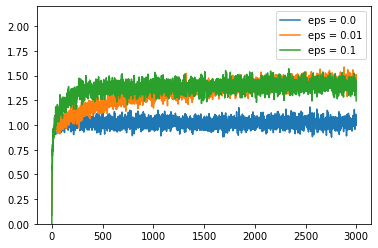

In [98]:
plt.plot(avg_outcome['0.0'],label="eps = 0.0")
plt.plot(avg_outcome['0.01'],label="eps = 0.01")
plt.plot(avg_outcome['0.1'],label="eps = 0.1")
plt.ylim(0,2.2)
plt.legend()
plt.show()

In [70]:
# Predefined average arm values
avg_outcome = run_simulation(500,3000,[0.0,0.01,0.1],arm_vals= [1.2,-1.1,1.8,10,-1.33,1.42,-1.5])

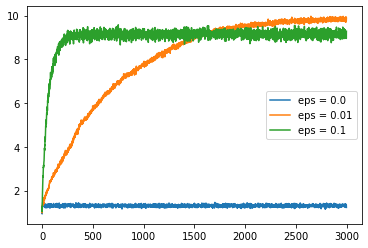

In [71]:
plt.plot(avg_outcome['0.0'],label="eps = 0.0")
plt.plot(avg_outcome['0.01'],label="eps = 0.01")
plt.plot(avg_outcome['0.1'],label="eps = 0.1")
#plt.ylim(0,2.2)
plt.legend()
plt.show()

## Non stationary problem

In [92]:
class NSBandit:
    def __init__(self, arm_vals = None, stationary = True):
        if arm_vals == None:
            self.arm_values = np.random.normal(0,1,10) # actual mean value of actions # mean reward
        else:
            self.arm_values = arm_vals
        self.K = np.zeros(len(self.arm_values)) # number of actions
        self.est_values = np.zeros(len(self.arm_values)) # estimated value of value of actions
        
    def get_reward(self,action):
        noise = np.random.normal(0,1)
        reward = self.arm_values[action] + noise
        return reward
    
    def choose_eps_greedy(self,epsilon):
        rand_num = np.random.random()
        if epsilon>rand_num:
            return np.random.randint(len(self.arm_values)) # Exploring # selecting random k value
        else:
            return np.argmax(self.est_values) # Exploiting # select action k with highest reward

    
    def update_est(self,action,reward):
        self.K[action] += 1
        alpha = 1./self.K[action]
        self.est_values[action] += alpha * (reward - self.est_values[action]) 
        # Updating the estimate value with the mean value of rewards
        # keeps running average of rewards

        

    def update_arm_vals(self,pull):
        # Adding non stationarity
        # changing the value of arm values with time
       
        for i in range(len(self.arm_values)):
            self.arm_values[i] += abs(np.random.normal(0,0.01))* pull*0.1

        print(self.arm_values)
        # for i in range(len(self.arm_values)):
        #     self.arm_values[i] += np.random.normal(0,0.1)

        

In [93]:
def run_experiment_ns(nsbandit,Npulls,epsilon):
    history = []
    for i in range(Npulls):
        action = nsbandit.choose_eps_greedy(epsilon) 
        R = nsbandit.get_reward(action)
        nsbandit.update_est(action,R)
        nsbandit.update_arm_vals(i)
        history.append(R)
    return np.array(history)


In [94]:
def run_simulation_ns(Nexp = 20,Npulls = 1000, epsilons = [0.05],arm_vals = None):
    
    avg_outcome = {}
    for epsilon in epsilons:
        avg_outcome[str(epsilon)]  = np.zeros(Npulls)

        for i in range(Nexp):
            bandit = NSBandit(arm_vals)
            avg_outcome[str(epsilon)]  += run_experiment(bandit,Npulls,epsilon)
        
        avg_outcome[str(epsilon)] /= np.float(Nexp)
    

    # Showcase the necessary plots
    for epsilon in epsilons:
        plt.plot(avg_outcome[str(epsilon)],label='eps = {}'.format(epsilon))
    
    plt.legend()
    plt.show()

    os.system('say "Done compiling"')

    return avg_outcome

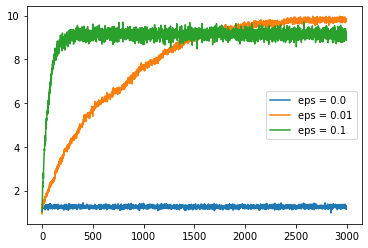

In [96]:
avg_outcome = run_simulation_ns(300,3000,[0.0,0.01,0.1],[1.2,-1.1,1.8,10,-1.33,1.42,-1.5])